# Investigate a Dataset of Movies
(https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1532469042115000)
# Table of Contents
<ul>
    <li><a herf='#intro'>1.Introduction</a></li>
    <li><a herf='#datawrangle'>2.Data Wrangling</a></li>
    <li><a herf='#eda'>3.Exploratory Data Analysis</a></li>
    <li><a herf='#conclusion'>4.Conclusion</a></li>
</ul>
# 1.Introduction
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.Here I want find Which genres are most popular from year to year and What kinds of properties are associated with movies that have high revenues. 


# 2.Data wrangling

## 2.1 Import tools

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

## 2.2 import dataset of movies 

In [2]:
movies=pd.read_csv('/Users/ccf8210/Downloads/testdata2_movies.csv',skiprows=1)#skip first line


## 2.3 Data Properties

In [3]:
print(movies.head(1))
movies.info()

   _WebResourceMIMEType_WebResourceTextEncodingName^WebResourceURL_WebResourceFrameName_WebResourceDataXtext/csvUUTF-8_^https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csvPO  \
0                                           135397.0                                                                                                                                                                                 

     imdb_id  popularity       budget       revenue  original_title  \
0  tt0369610   32.985763  150000000.0  1.513529e+09  Jurassic World   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   

                        homepage         director            tagline  ...  \
0  http://www.jurassicworld.com/  Colin Trevorrow  The park is open.  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...   124.0   


####  summary:
1. name of  columns[0] is  to long ,need to be rename
2. dtype of columns[0]  is float  ,need to be changed to int
3. movies.release_year is float ,need to be changed to period
4. movies.release_date ,need to be changed to datetime
5. movies.revenue_adj, need to be changed to float
6. movies.genres,movies.cast,movies.production_companies combineda lot of information together,need to be clean depand on analisys


## 2.4 data wrangle
### 2.4.1 column rename

In [4]:
# changge name of first column
col_1=movies.columns[0]
movies.rename(columns={col_1:'resourece'},inplace=True)
movies.head(1)

,resourece,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397.0,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562.0,6.5,2015.0,137999939.3,1392445893


### 2.4.2 change data type

In [5]:
#change data type
movies.revenue_adj

0                   1392445893
1                  348161292.5
2                  271619025.4
3                   1902723130
4                   1385748801
                 ...          
10862                        0
10863                        0
10864                        0
10865    0</pre></body></html>
10866                      NaN
Name: revenue_adj, Length: 10867, dtype: object

In [6]:
movies.iloc[10865,:] 

resourece                                                           22293
imdb_id                                                         tt0060666
popularity                                                       0.035919
budget                                                              19000
revenue                                                                 0
original_title                                   Manos: The Hands of Fate
cast                    Harold P. Warren|Tom Neyman|John Reynolds|Dian...
homepage                                                              NaN
director                                                 Harold P. Warren
tagline                      It's Shocking! It's Beyond Your Imagination!
keywords                              fire|gun|drive|sacrifice|flashlight
overview                A family gets lost on the road and stumbles up...
runtime                                                                74
genres                                

####  summary:
This row is not an empty ,need to repalce the wrong data of revenue_adj

In [7]:
movies.revenue_adj[10865]=0
movies.revenue_adj.dtype

/Users/ccf8210/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


dtype('O')

####  summary:
still not be float

In [8]:
movies.revenue_adj=pd.to_numeric(movies.revenue_adj)#changge data style

In [9]:
movies.revenue_adj

0        1.392446e+09
1        3.481613e+08
2        2.716190e+08
3        1.902723e+09
4        1.385749e+09
             ...     
10862    0.000000e+00
10863    0.000000e+00
10864    0.000000e+00
10865    0.000000e+00
10866             NaN
Name: revenue_adj, Length: 10867, dtype: float64

####  summary:
The last row is nan ,need to be deleted,check the last row of other columns

In [10]:
movies.iloc[10866,:]

resourece               NaN
imdb_id                 NaN
popularity              NaN
budget                  NaN
revenue                 NaN
original_title          NaN
cast                    NaN
homepage                NaN
director                NaN
tagline                 NaN
keywords                NaN
overview                NaN
runtime                 NaN
genres                  NaN
production_companies    NaN
release_date            NaN
vote_count              NaN
vote_average            NaN
release_year            NaN
budget_adj              NaN
revenue_adj             NaN
Name: 10866, dtype: object

In [11]:
movies.dropna(how='all',axis=0,inplace=True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 0 to 10865
Data columns (total 21 columns):
resourece               10866 non-null float64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null float64
revenue                 10866 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null float64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null float64
vote_average            10866 non-null float64
release_year            10866 non-null float64
budget_adj   

#### change the dtype of resourece

In [12]:
movies.resourece=movies.resourece.astype('int').astype('str')
print(movies.resourece.dtype)

object


#### changge the dtype of release year

In [13]:
movies.release_year=movies.release_year.astype('int').astype('str')
pd.to_datetime(movies.release_year).map(lambda x:x.to_period('Y'))
print(movies.release_year)
movies.release_date=pd.to_datetime(movies.release_date,format='%m/%d/%y')
print(movies.release_date.dtype)
movies.release_date.head(1)

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
10861    1966
10862    1966
10863    1966
10864    1966
10865    1966
Name: release_year, Length: 10866, dtype: object
datetime64[ns]


0   2015-06-09
Name: release_date, dtype: datetime64[ns]

####  summary:
cast ,genres ,product_companies  need to be clean ,I just want to ananlysis popularity of generes , and I really dont farmilary with  cast ,and from year to year ,cast changge to much. product_companies wil be explored later base on ther revenue.

### 2.4.3 columns change

## one hot ，how many kinds of movies

In [14]:
#genres 
gen=(set(x.split('|')) for x in movies.genres.dropna())
gens=sorted(set.union(* gen))
print(gens)
print(len(gens))


['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']
20


####  summary:
There are 20 different types of movies 

### dummies of genres

In [15]:
dummies=pd.DataFrame(np.zeros((len(movies),len(gens))),columns=gens)
x=set()
for i,j in enumerate(movies.genres.dropna()):
    dummies.loc[i,j.split('|')]=1

dummies

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### combine dummies with movies

In [16]:
#movies_windic=movies.join(dummies.add_prefix('Genre_'))
movies_windic=movies.join(dummies)
movies_windic.drop(columns='genres',inplace=True) 
movies_windic.loc[0]


resourece                                                          135397
imdb_id                                                         tt0369610
popularity                                                        32.9858
budget                                                            1.5e+08
revenue                                                       1.51353e+09
original_title                                             Jurassic World
cast                    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
homepage                                    http://www.jurassicworld.com/
director                                                  Colin Trevorrow
tagline                                                 The park is open.
keywords                monster|dna|tyrannosaurus rex|velociraptor|island
overview                Twenty-two years after the events of Jurassic ...
runtime                                                               124
production_companies    Universal Stud

### explore cast 

In [17]:
cast=set()
temper=movies.cast.dropna().str.split('|',expand=True)
for i in temper.columns:
    for j in temper.iloc[:,i]:
        cast.add(j)
cast=list(cast)
#gen.pop(-3)
print(len(cast))

19028


####  summary:
too many cast ,I don't want  to explory them

In [18]:
### explory production_companies
companies=set()
temper=movies.production_companies.dropna().str.split('|',expand=True)
for i in temper.columns:
    for j in temper.iloc[:,i]:
        companies.add(j)
companies=list(companies)
#gen.pop(-3)
print(len(companies))

7880


####  summary:
There are 7880 production companies ,It  can be used in later .

### 2.4.4  statistic of  dataset

In [19]:
movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


#### min,25%,50% of buget,revenue,buget_adj,revenue_adj are 0,so there may have a lot of 0 ,and need to be  del 
#### when investigate revenue.

# 3.Exploratory Data Analysis

## 3.1  which genres are the most popular from year to year?


### 3.1.1 The sum of diffent genres  compared with Mean and Median

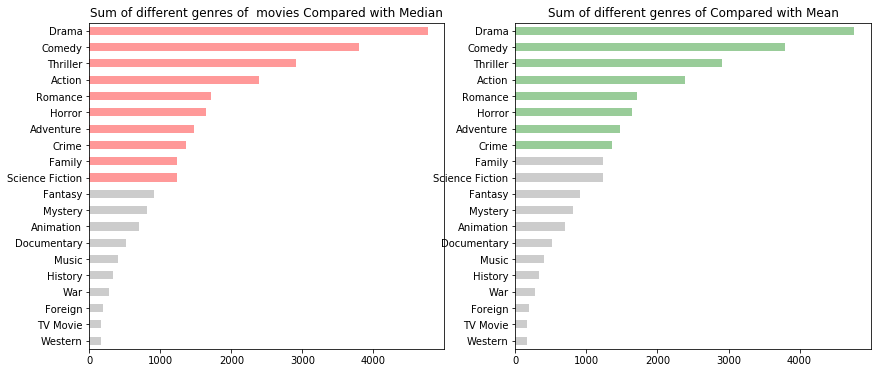

In [20]:
w={}
for i in gens:
    # data for genre i 
    data=movies_windic[['release_year','vote_count','vote_average']][movies_windic[i]==1]
    # caculate the sum of genre i 
    w.update({i:len(data)})
w=pd.DataFrame([w])
w=w.T
w.rename(columns={0:'Total'},inplace=True)

# caculte mean and median 
w=w.sort_values(by='Total',ascending=True)
Median=w['Total'].median()
Mean=w['Total'].mean()

# give different color
w['color_median']=w['Total'].map(lambda x: np.where(x>Median,'r','grey'))
w['color_mean']=w['Total'].map(lambda x: np.where(x>Mean,'g','grey'))
#plot figures
fig,axes=plt.subplots(1,2,figsize=(14,6))
w['Total'].plot(kind='barh',color=w.color_median,alpha=0.4,fontsize=10,
                title='Sum of different genres of  movies Compared with Median',ax=axes[0])
w['Total'].plot(kind='barh',color=w.color_mean,alpha=0.4,
                fontsize=10,title='Sum of different genres of Compared with Mean',ax=axes[1])                                      



####  summary:
1.  The sum of diffent  genres were  ranked  descening ,and more than average  are  Drama,Comdey,Thriller,Action,Horror,Adventure,Crime.
2. A large total does not mean that the growth trend is also large, which may mask some certainty issues, so the trend needs to be further analyzed.


### 3.1.2  volume of genres  from year 1960-2015

####  From the perspective of  volume of movies ,observe tWhich type of film is growing faster.

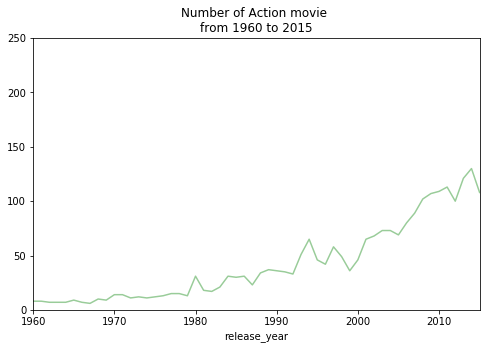

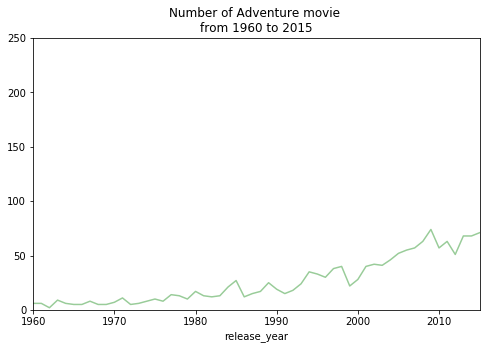

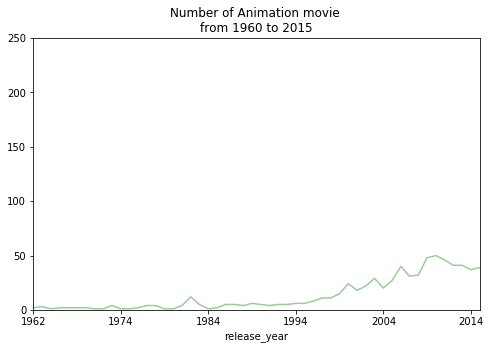

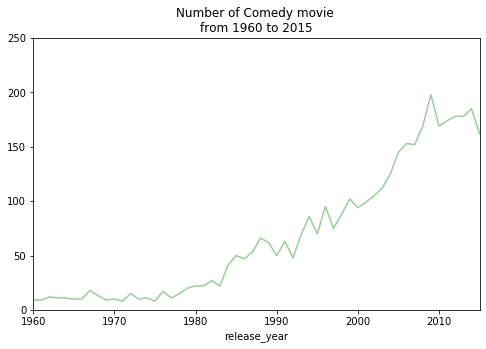

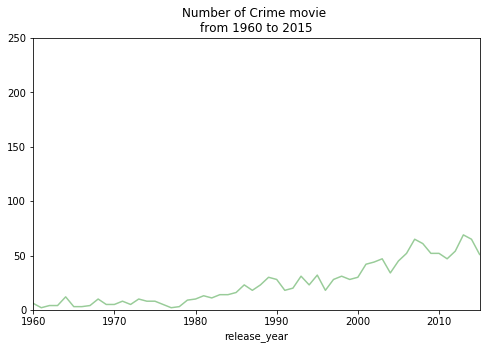

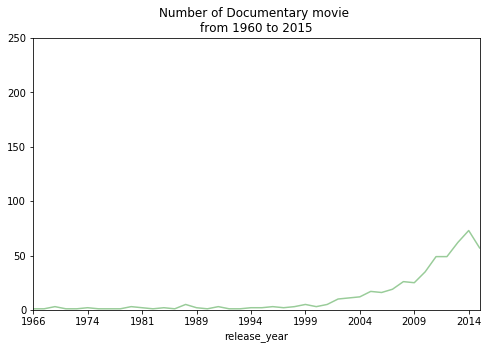

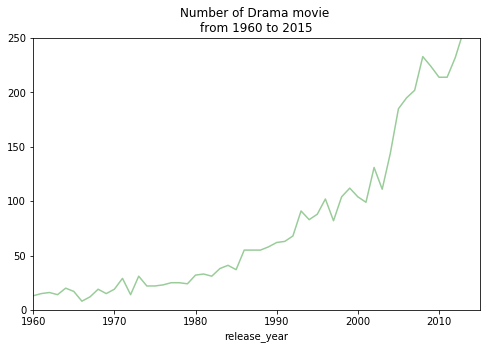

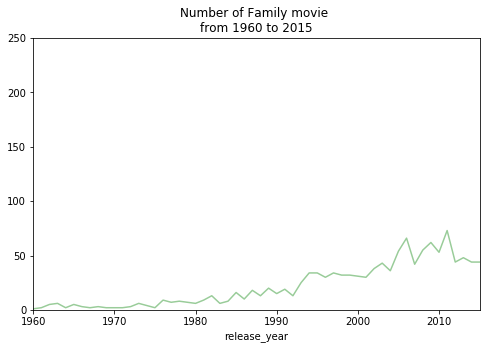

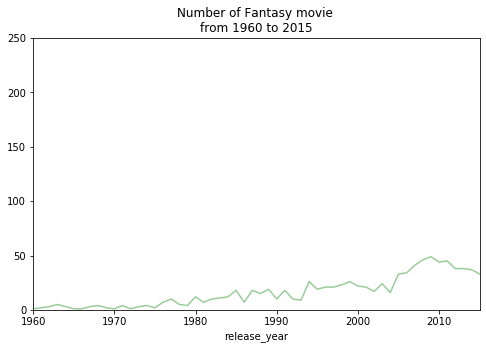

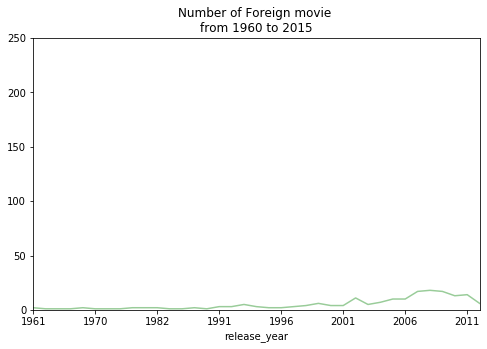

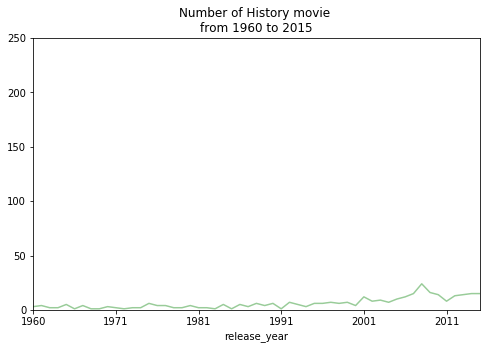

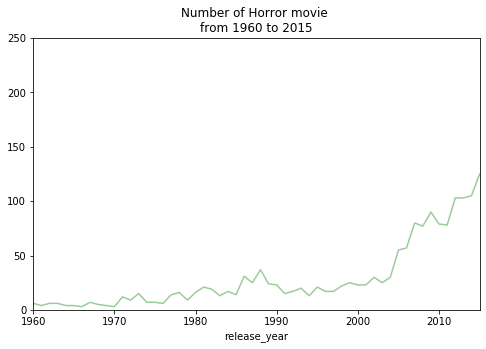

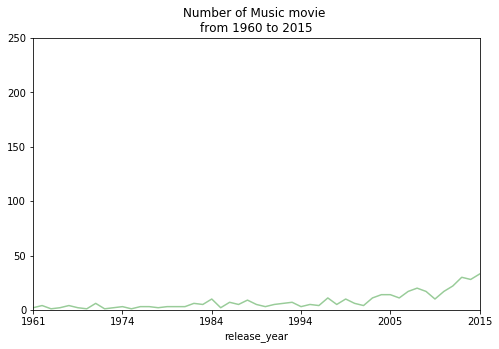

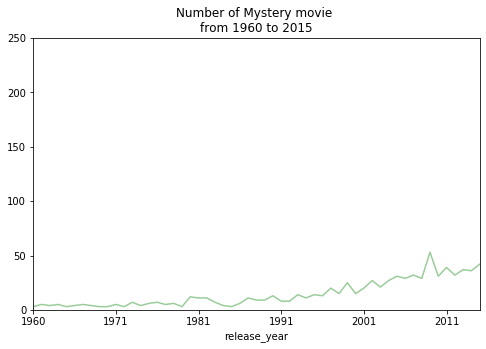

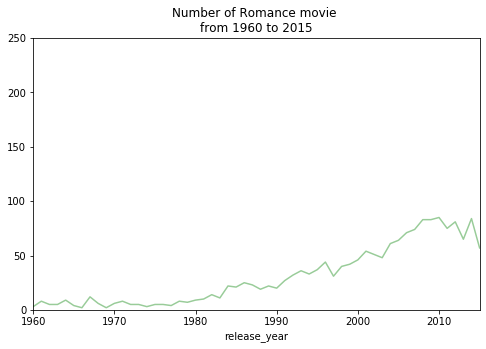

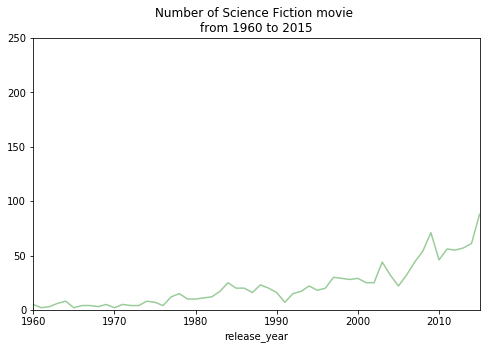

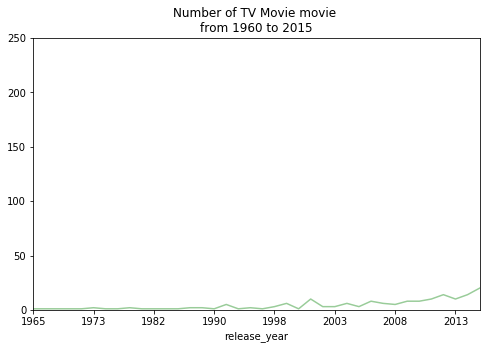

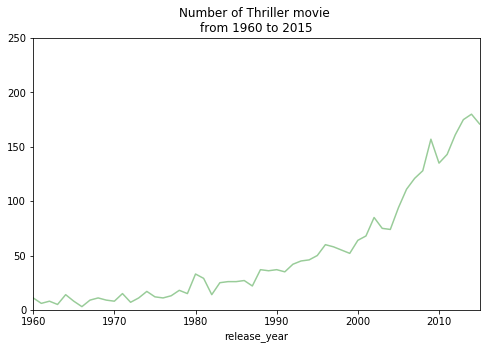

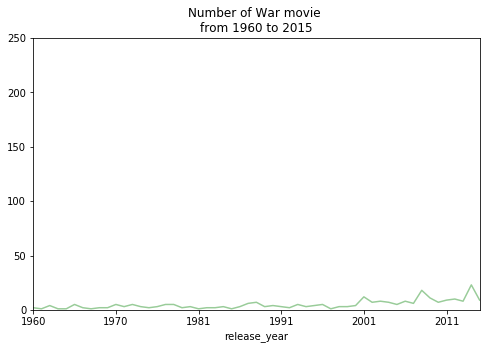

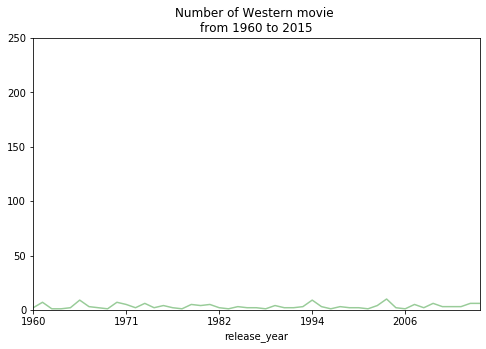

In [21]:

gens=list(dummies)
for i in gens:
    # movies of kind i
    data=movies_windic[['release_year','vote_count','vote_average',i]][movies_windic[i]==1]
    #caculate the sum vote_count of i   base on  different years
    ####data_count=data.groupby('release_year')[['vote_count','release_year']].sum()
     
    #caculate sum of number of i  base on different year
    data_size=data.groupby('release_year').vote_count.size()
    # plot figs
    
    fig,ax=plt.subplots(1,1,figsize=(8,5))
    '''
    ax1=axes[0]
    data_count.plot(kind='bar',
              title='Vote _count of '+i+' movie \nfrom 1960 to 2015',alpha=0.4,ax=ax1)
    ax2=axes[1]
    '''
    data_size.plot(title='Number of '+i+' movie \nfrom 1960 to 2015',color='g',alpha=0.4,ax=ax,ylim=[0,250])
    


#### Summary:
The development of film can be basically divided into three stages.
* First, the stage of steady development. Around 1960-1980, the development of movies was relatively stable.
* Second, the period of rapid development, from 1980 to 2000. During this period, comedy, drama developed rapidly,occupying absolute market advantages, and at the same time, action and crime developed.
* ThirdGenre movies have bloomed. Action, adventure, animation, horror,  crime, science, thriller, dental, family, fantasy, mystery, have all grown rapidly. highest.

The market share of films reflects to some extent the popularity of such films by investors.
So, must the movie with the highest market share be loved by the audience?
We hope to further analyze the popularity of the audience through popularity.



###  Use popularity to see if a movie is popular with viewers

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


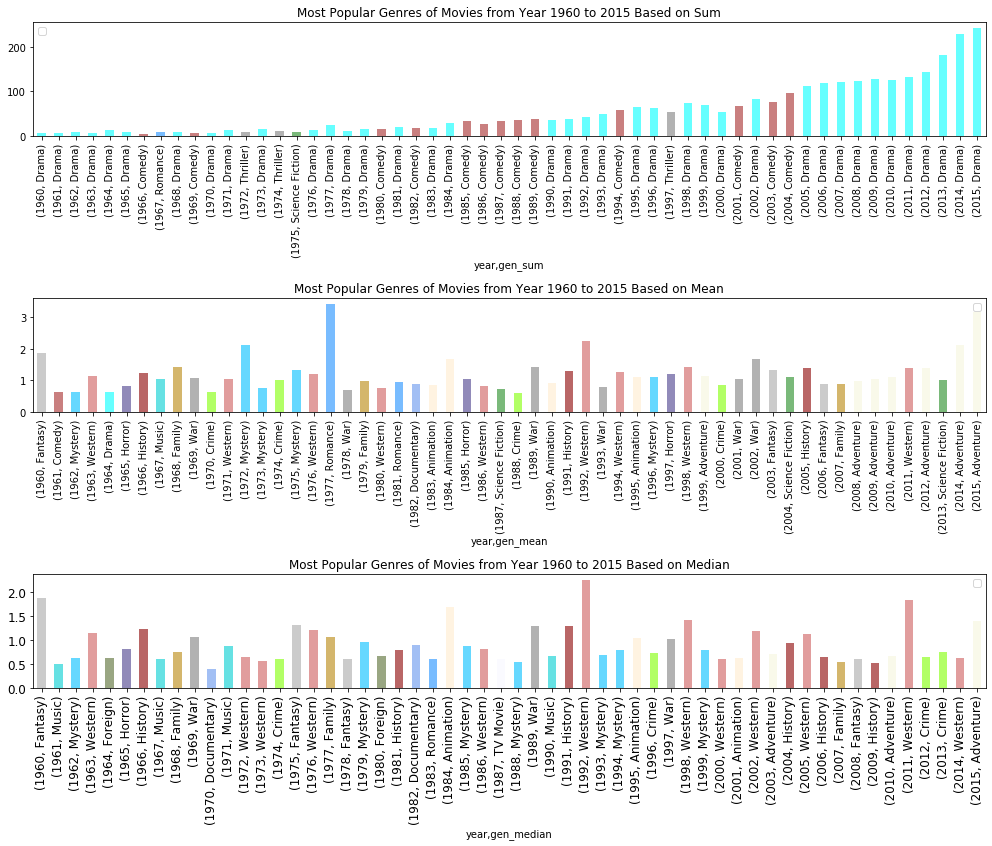

In [22]:
#  use ,sum ,median ,mean to meaure where is popular or not.

data=movies_windic.set_index('release_year')
# create a new dataframe 
popu=pd.DataFrame(columns=['year','gen_sum','popularity_sum',
                        'gen_mean','popularity_mean',
                        'gen_median','popularity_median'])

for i in data.index.unique().sort_values():
    flag_sum,flag_mean,flag_median=0,0,0
    gen_sum,gen_mean,gen_median='','',''
    for j in gens:
        #print(i,j)
        temper=movies_windic[movies_windic['release_year']==i]# data of  year i 
        temper=temper['popularity'][temper[j]==1] # popularity of genre ij
        popularity_sum=temper.fillna(0).sum() #caculate the sum of popularity 
        popularity_mean=temper.fillna(0).mean()
        popularity_median=temper.fillna(0).median()
        if popularity_sum >flag_sum:
            flag_sum=popularity_sum
            gen_sum=j# mark the most popularity genre and the popularity
        if popularity_mean>flag_mean:
            flag_mean=popularity_mean
            gen_mean=j
        if popularity_median >flag_median:
            flag_median=popularity_median
            gen_median=j
    popu.loc[len(popu)]=[i,gen_sum,flag_sum,gen_mean,flag_mean,gen_median,flag_median]
    
#print(popu)
import matplotlib
color=[]
for name, hex in matplotlib.colors.cnames.items():
    color.append(name)

colormap=dict(zip(gens,color[2:63:3]))#make a color map

popu['color_sum']=popu['gen_sum'].map(colormap)
popu['color_mean']=popu['gen_mean'].map(colormap)
popu['color_median']=popu['gen_median'].map(colormap)
fig,axes=plt.subplots(3,1,figsize=(14,60))
popu_sum=popu.set_index(['year','gen_sum'])
popu_mean=w=popu.set_index(['year','gen_mean'])
popu_median=popu.set_index(['year','gen_median'])

popu_sum.plot(y='popularity_sum',kind='bar',figsize=(14,10),fontsize=10,alpha=0.6,
                    color=popu_sum['color_sum'],
                    title='Most Popular Genres of Movies from Year 1960 to 2015 Based on Sum',
                        ax=axes[0],label='')
axes[0].legend(loc='best')

popu_mean['popularity_mean'].plot(kind='bar',figsize=(14,10),fontsize=10,alpha=0.6,
                    color=popu_mean['color_mean'],
                    title='Most Popular Genres of Movies from Year 1960 to 2015 Based on Mean',
                         ax=axes[1],label='')
plt.tight_layout()
axes[1].legend(loc='best')
popu_median['popularity_median'].plot(kind='bar',figsize=(14,10),fontsize=12,alpha=0.6,
                    color=popu_median['color_median'],
                    title='Most Popular Genres of Movies from Year 1960 to 2015 Based on Median',
                           ax=axes[2],label='')
axes[2].legend(loc='best')




### Summary：
* First, based on the total popularity, to measure the overall popularity of the market, we can find that Drama and commedy have absolute advantages, especially Drama.
* Second, combined with Mean to observe, War, Animation, Adventure, Fatansy are more popular. The  Animation was more popular from 1983 to 1995 and Adventure has been very popular since 2008, and the volume of such movies has also increased rapidly since 2000.
* Point three, combined with Median, Western movies are more popular, Fatansy and Crime movies are more popular. However, the number of western movies shot is small, it has not had a significant impact on the popularity of the entire market.

It can be seen that although the main types of the entire market are Drama and Commedy, the development of small-share movies is more worthy of attention, such as War, animation, Adventure, Fantansy,especially Adventure, the performance of this movie's various indicators is good, and it is worth paying attention to.



In [23]:
###?这里要不要根据欢迎指数直接换一个受欢迎的电影的图啊 ？值得思考？验证？

##  3.2 What kinds of properties are associated with movies that have high revenues.

In [24]:
movies_windic[['budget_adj','revenue_adj']].describe()

,budget_adj,revenue_adj
count,1.086600e+04,1.086600e+04
mean,1.755104e+07,5.136436e+07
std,3.430616e+07,1.446325e+08
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,2.085325e+07,3.369710e+07
max,4.250000e+08,2.827124e+09


### There are a large number of 0 values so that need to be cleaned


In [25]:
print(movies_windic.shape)
movies_profit=movies_windic[movies_windic['revenue_adj']!=0]# 
print(movies_profit.shape)
budget_reve=movies_profit[movies_profit['budget_adj']!=0] # find relationship between revenue and budget

print(budget_reve.shape)


(10866, 40)
(4850, 40)
(3855, 40)


In [26]:
movies_profit.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj,Action,Adventure,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
count,4850.000000,4.850000e+03,4.850000e+03,4850.000000,4850.000000,4850.000000,4.850000e+03,4.850000e+03,4850.000000,4850.000000,...,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000
mean,1.045109,2.956970e+07,8.922066e+07,107.964742,436.215876,6.148763,3.516102e+07,1.150774e+08,0.241031,0.148041,...,0.030515,0.132990,0.031753,0.081031,0.175670,0.117938,0.008660,0.285979,0.026598,0.015464
std,1.356628,4.051343e+07,1.620684e+08,21.112847,806.416200,0.798795,4.375672e+07,1.988419e+08,0.427753,0.355177,...,0.172019,0.339599,0.175359,0.272911,0.380578,0.322568,0.092664,0.451926,0.160922,0.123401
min,0.001117,0.000000e+00,2.000000e+00,15.000000,10.000000,2.100000,0.000000e+00,2.370705e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387754,1.700000e+06,7.708081e+06,95.000000,46.000000,5.600000,2.332078e+06,1.046262e+07,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.680289,1.500000e+07,3.182654e+07,104.000000,147.000000,6.200000,2.032801e+07,4.392749e+07,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.210457,4.000000e+07,9.991823e+07,117.000000,435.000000,6.700000,4.973516e+07,1.315644e+08,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,4.250000e+08,2.827124e+09,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
budget_reve.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj,Action,Adventure,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
count,3855.000000,3.855000e+03,3.855000e+03,3855.000000,3855.000000,3855.00000,3.855000e+03,3.855000e+03,3855.000000,3855.000000,...,3855.00000,3855.000000,3855.000000,3855.000000,3855.000000,3855.000000,3855.000000,3855.000000,3855.00000,3855.000000
mean,1.191400,3.720183e+07,1.076589e+08,109.215824,527.611933,6.16786,4.423630e+07,1.370294e+08,0.251621,0.154345,...,0.03061,0.124773,0.029053,0.082490,0.184436,0.122438,0.006744,0.292348,0.02620,0.015305
std,1.475002,4.220291e+07,1.765248e+08,19.922166,879.868374,0.79504,4.480403e+07,2.160944e+08,0.434001,0.361326,...,0.17228,0.330504,0.167977,0.275146,0.387889,0.327834,0.081858,0.454900,0.15975,0.122778
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.20000,9.693980e-01,2.370705e+00,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.462448,1.000000e+07,1.357645e+07,95.000000,71.000000,5.70000,1.309053e+07,1.834123e+07,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.797298,2.400000e+07,4.479322e+07,106.000000,204.000000,6.20000,3.001558e+07,6.171861e+07,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,1.368245,5.000000e+07,1.241530e+08,119.000000,580.000000,6.70000,6.061307e+07,1.632401e+08,1.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.40000,4.250000e+08,2.827124e+09,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000



### explore the relationship between revenue and budget

/Users/ccf8210/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


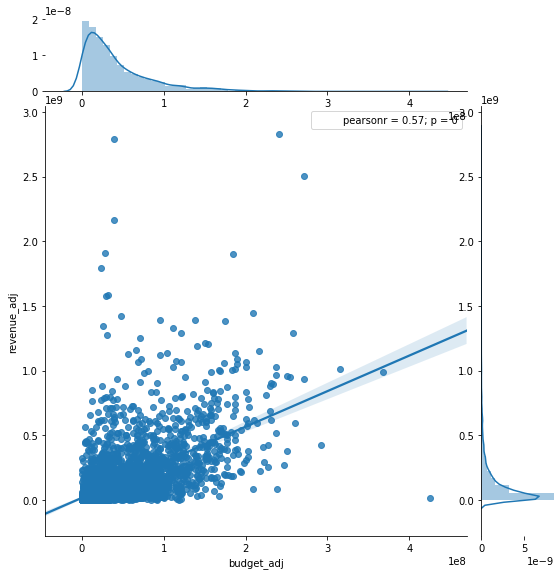

In [28]:
sns.jointplot(x=budget_reve['budget_adj'],y=budget_reve['revenue_adj'],size=8,kind='reg')


####  summary:
It can be seen that the relationship between revenue and budget is 0.57, the pvalue is 0<0.05.



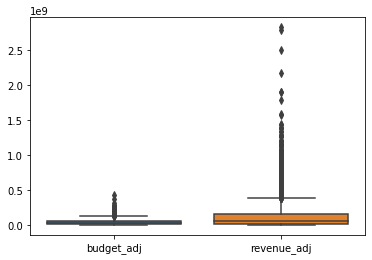

In [29]:
sns.boxplot(data=budget_reve[['budget_adj','revenue_adj']])


####  summary:
Slightly, budget is not equal to cost, so the profit level cannot be calculated. However, there is a certain relationship between budget and revenue.

### revenue and popularity

/Users/ccf8210/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


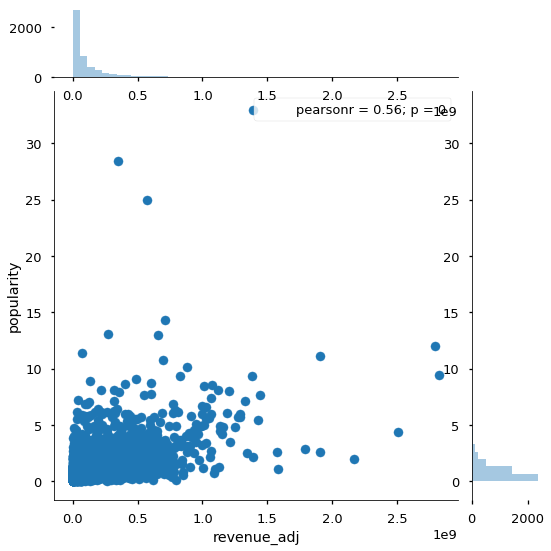

In [30]:
sns.set_context('talk')
sns.jointplot(data=movies_profit,x='revenue_adj',y='popularity',size=8)



####  summary:
Revenue is positively correlated with popularity, with a correlation coefficient of 0.56 and pvalue <0.05, but because the magnitudes of the two variables are very different, you need to further reduce the revenue_adj for logarithmic processing.



/Users/ccf8210/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


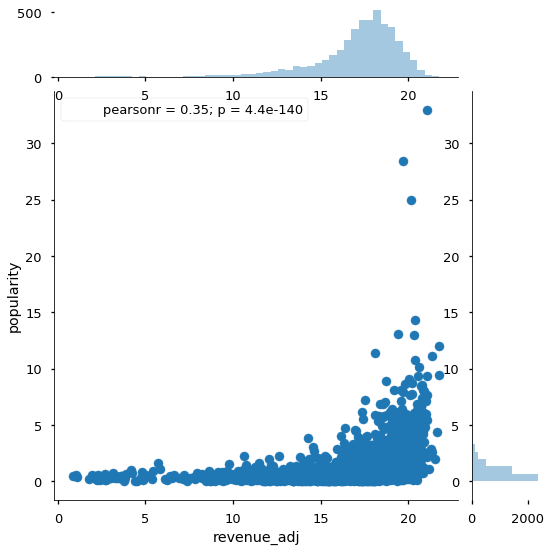

In [31]:
sns.jointplot(data=movies_profit,x=np.log(movies_profit['revenue_adj']),y='popularity',size=8)

####  summary:
1. It can basically be seen that the higher the popularity, the higher the np.log (revenue). A bit exponential relationship.

2. It can be seen that revenue is closely related to the popularity of movies. The more popular movies, the higher the revenue.

### runtime and revenue

/Users/ccf8210/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


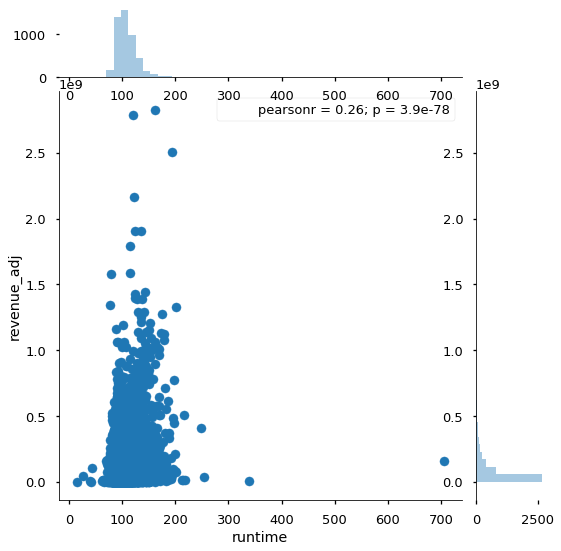

In [32]:
sns.set_context('talk')
sns.jointplot(data=movies_profit,y='revenue_adj',x=movies_profit['runtime'],size=8)

####  summary:
There is a certain correlation between runtime and revenue_adj, with a correlation coefficient of 0.26 and pvalue <0.05.

104.0


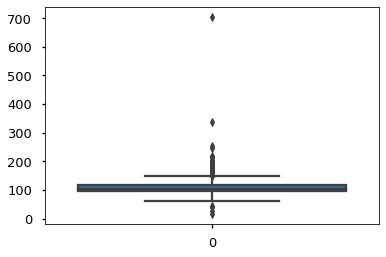

In [33]:
sns.boxplot(data=movies_profit['runtime'])
print(movies_profit['runtime'].median())

####  summary: median of runtime is 104 min.


### invest  release_year with revenue

/Users/ccf8210/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


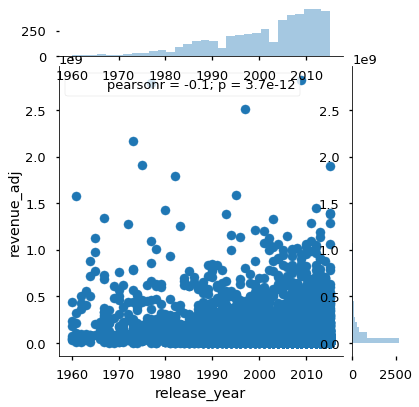

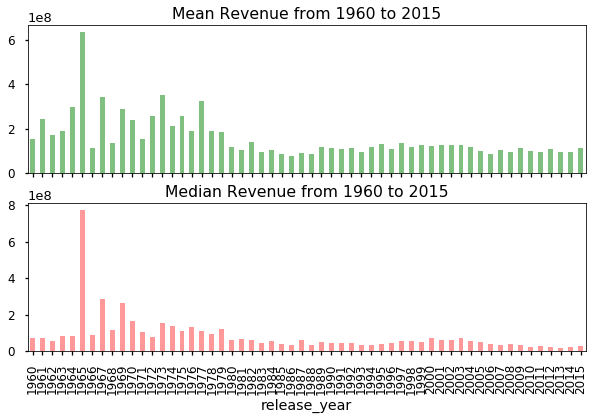

In [34]:
sns.jointplot(data=movies_profit,y='revenue_adj',x=movies_profit['release_year'].astype(str).astype(int))
fig,axes=plt.subplots(2,1,figsize=(10,12))
# check the tren of the mean of revenue
movies_profit['revenue_adj'].groupby(movies_profit['release_year']).mean().plot(kind='bar',figsize=(10,6),fontsize=12,
                                                                            title='Mean Revenue from 1960 to 2015',
                                                                           ax=axes[0],color='g',alpha=0.5)
# check the tren of the median of revenue
movies_profit['revenue_adj'].groupby(movies_profit['release_year']).median().plot(kind='bar',figsize=(10,6),fontsize=12,
                                                                            title='Median Revenue from 1960 to 2015',
                                                                             ax=axes[1],color='r',alpha=0.4,
                                                                             sharex=axes[0])

#sns.boxplot(data=movies_profit,y='revenue',x=movies_profit['release_year'].astype(str).astype(int))

####  summary:
It can be found from the above that there is a correlation between release_year and revival. The person coefficient is -0.1 and Pvalue <0.05, so the correlation holds. From an mean point of view, renvenue shows a certain downward trend, and from a median point of view, revenue will be a bit lower,a litttle better around year 2000.

### genres and  revenue

No handles with labels found to put in legend.


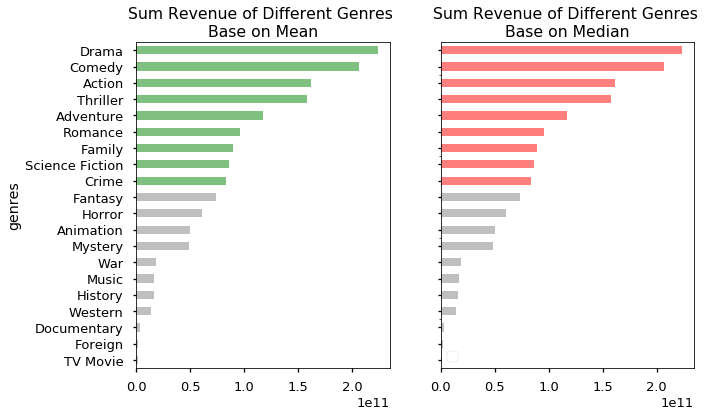

In [35]:

'''
caculate different sum of revenue of different kind genres,
then draw two figures to show details.
'''

df=pd.DataFrame(columns=['genres','sum_revenue'])
for i in gens:
        data=movies_profit['revenue_adj'][movies_profit[i]==1].sum()
        df.loc[len(df)]=[i,data]
        
#caculate mean and median 
mean=df['sum_revenue'].mean()
median=df['sum_revenue'].mean()

# sort sum_revenue
df=df.set_index('genres').sort_values(by='sum_revenue',ascending=True)

#give differen color when compare sum_revenue with mean or median
df['mean_color']=df['sum_revenue'].map(lambda x: np.where(x>mean,'g','grey'))
df['median_color']=df['sum_revenue'].map(lambda x: np.where(x>median,'r','grey'))
#draw pictures
fig,axes=plt.subplots(1,2,figsize=(20,6))
df['sum_revenue'].plot(kind='barh',title='Sum Revenue of Different Genres \nBase on Mean',
           figsize=(10,6), ax=axes[0],color=df['mean_color'],alpha=0.5)

df['sum_revenue'].plot(kind='barh',title='Sum Revenue of Different Genres \nBase on Median',
           figsize=(10,6), ax=axes[1],color=df['median_color'],sharey=axes[0],
           alpha=0.5,label='')
axes[1].legend(loc='best')

####  summary:
we can see from above two figures that Drama ,Comedy,Action,Thriller,Adventure,Family,science Fiction ,Romance
and  Crime all higher than mean and median of population.

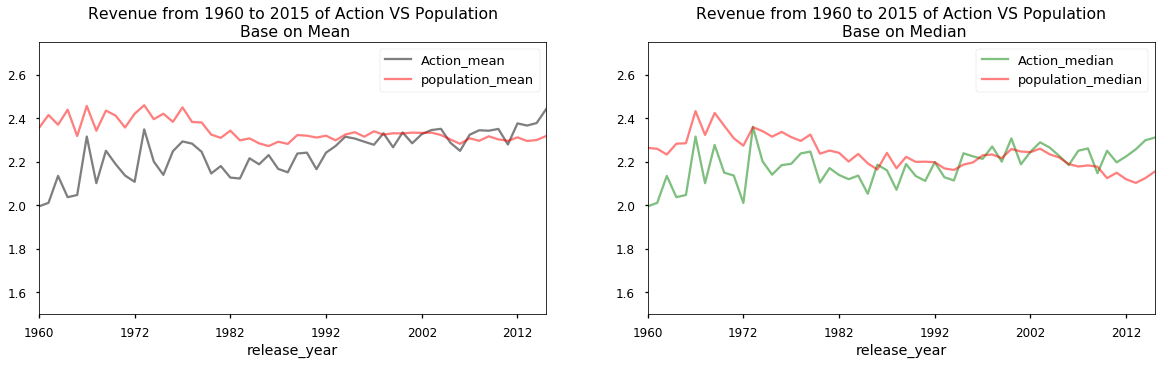

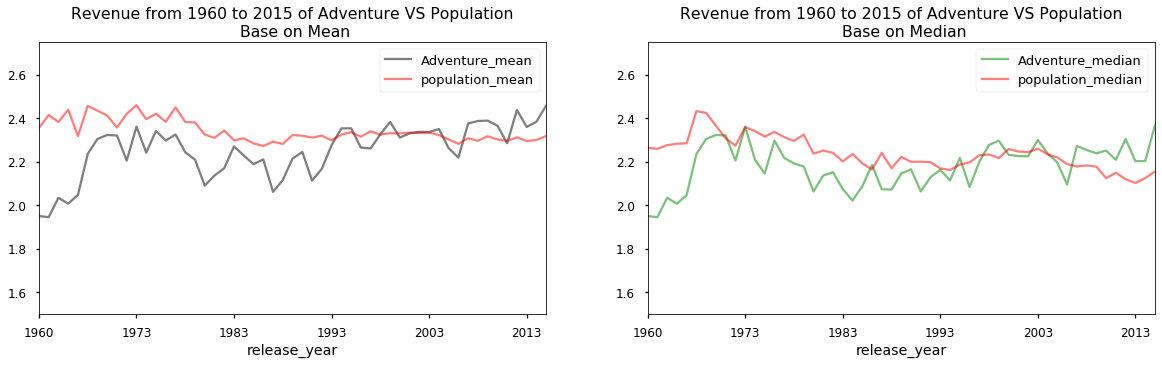

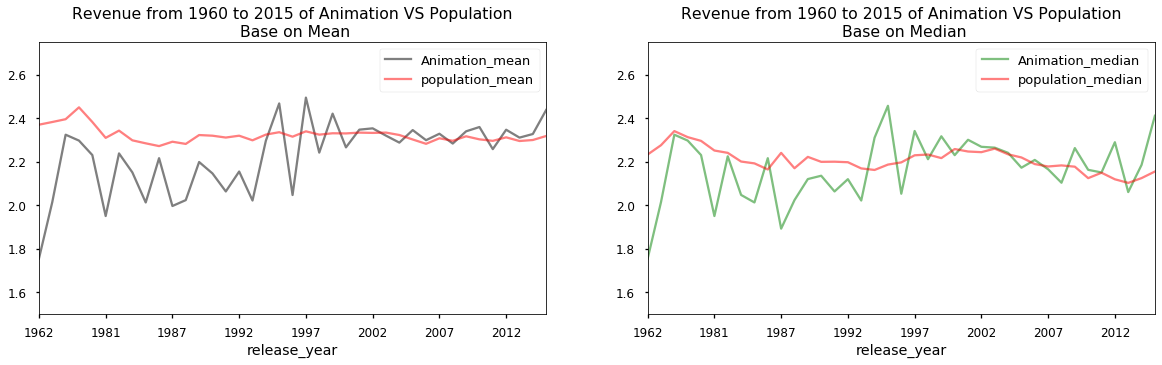

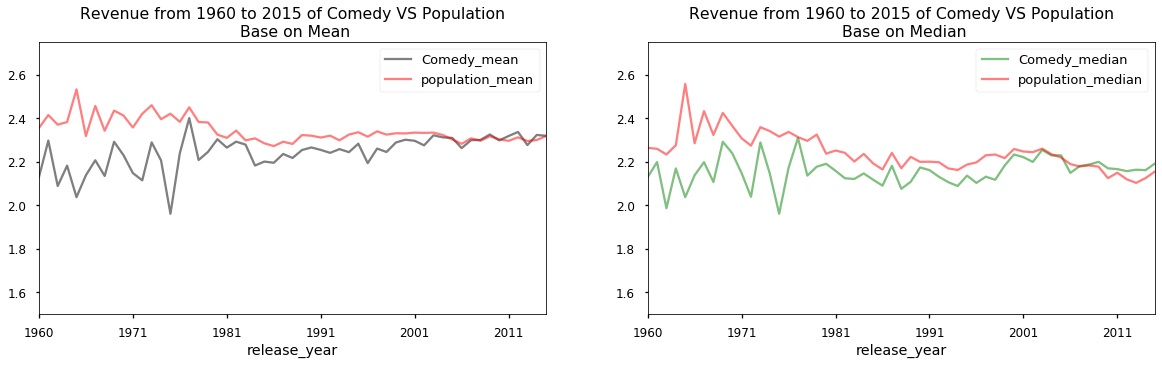

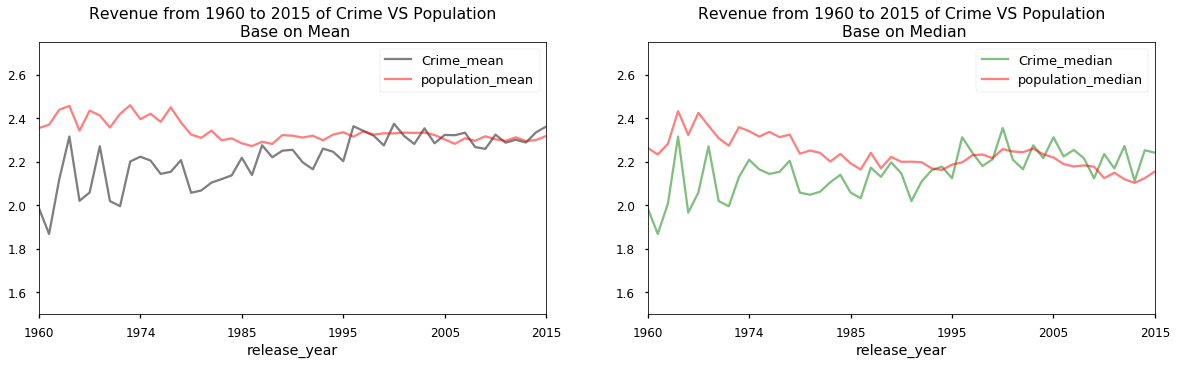

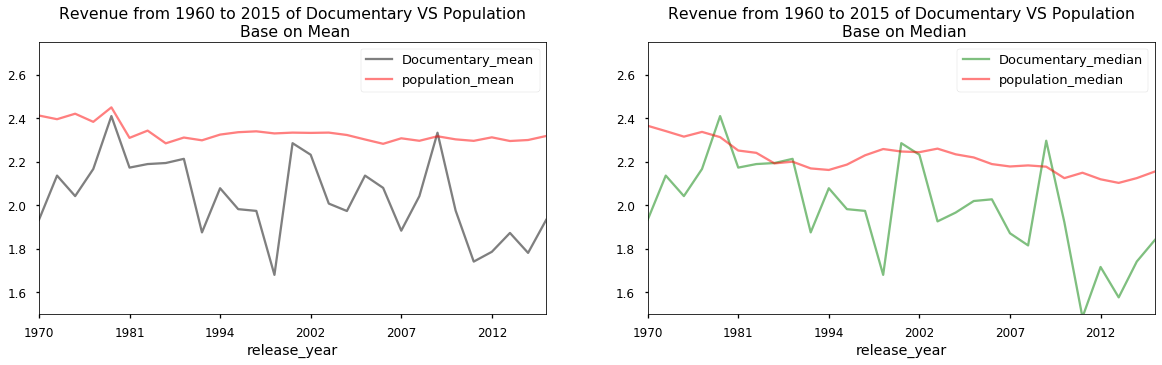

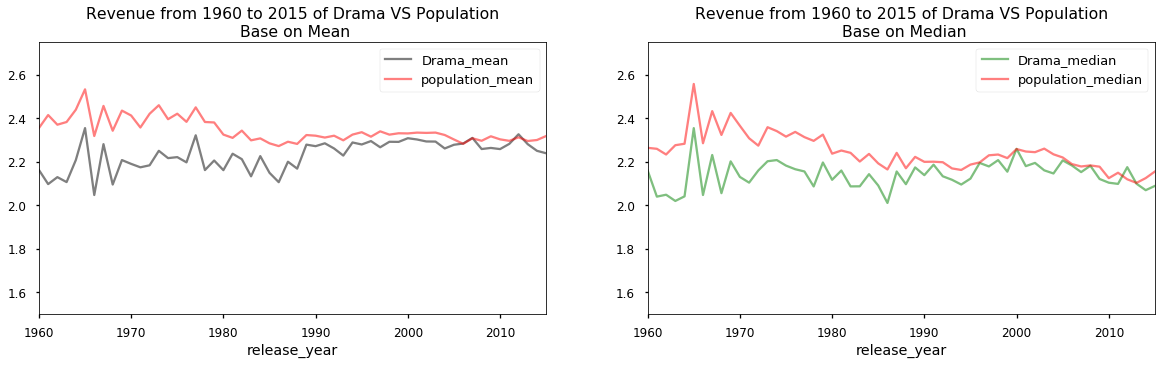

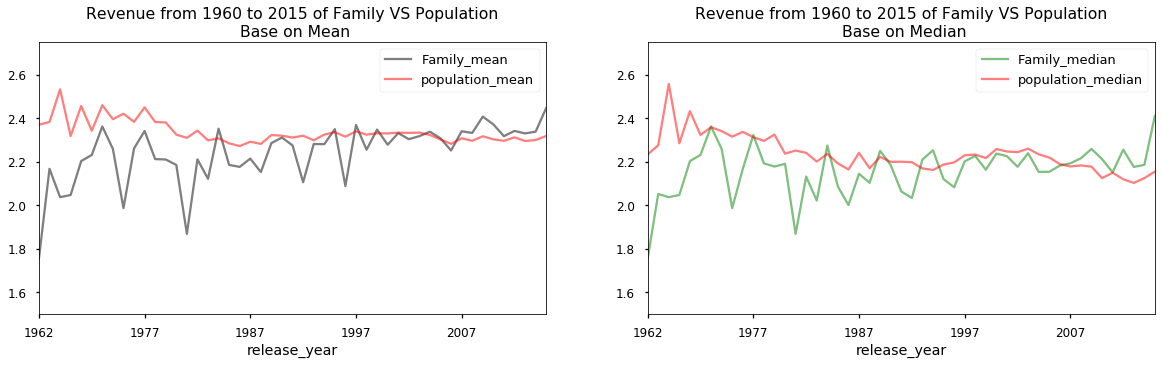

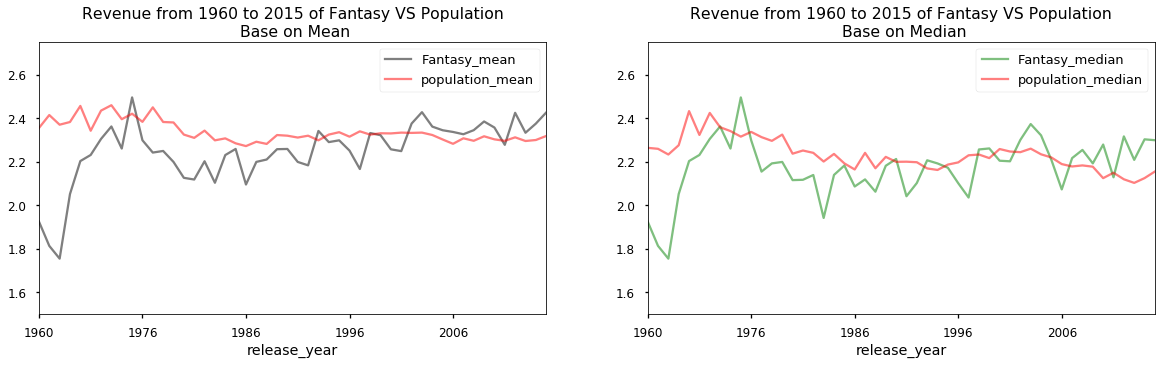

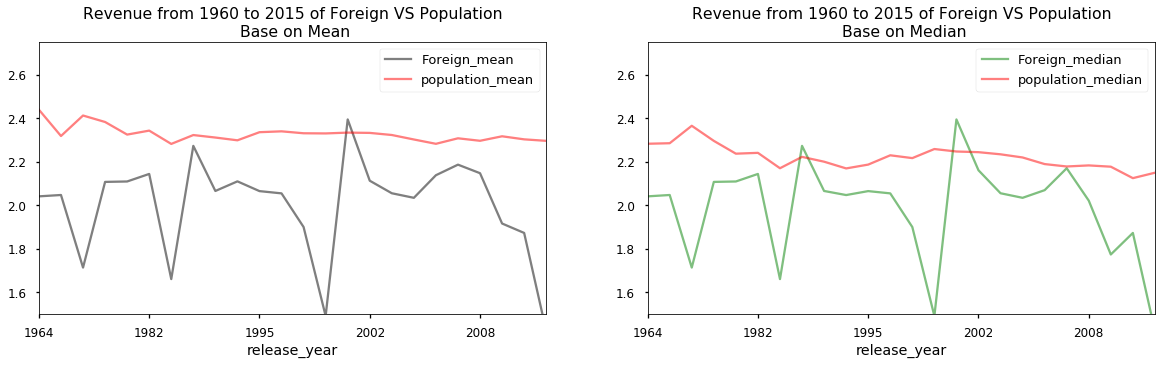

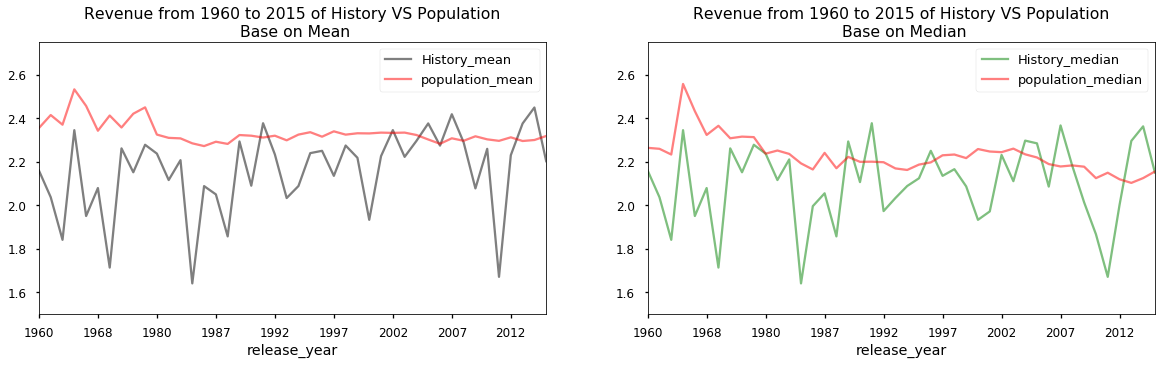

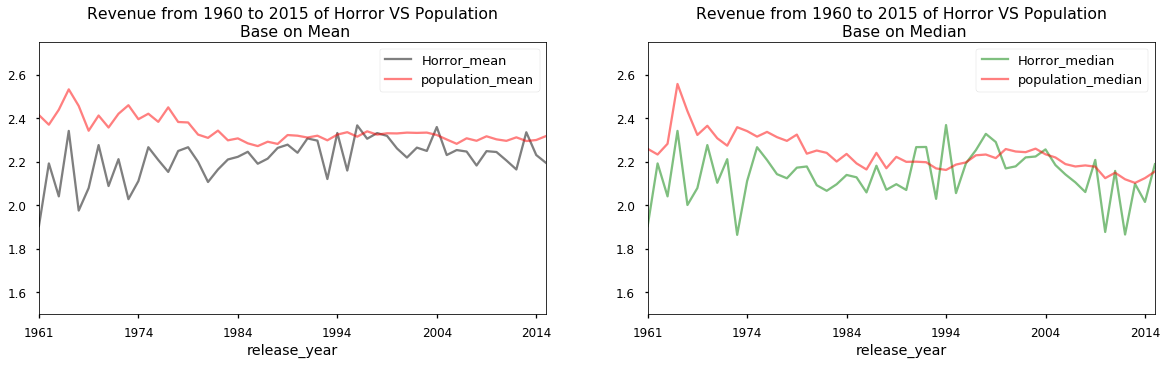

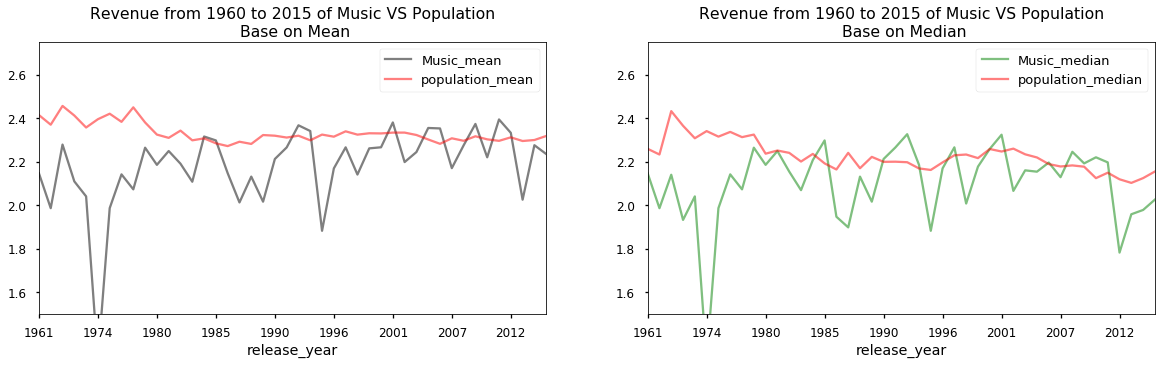

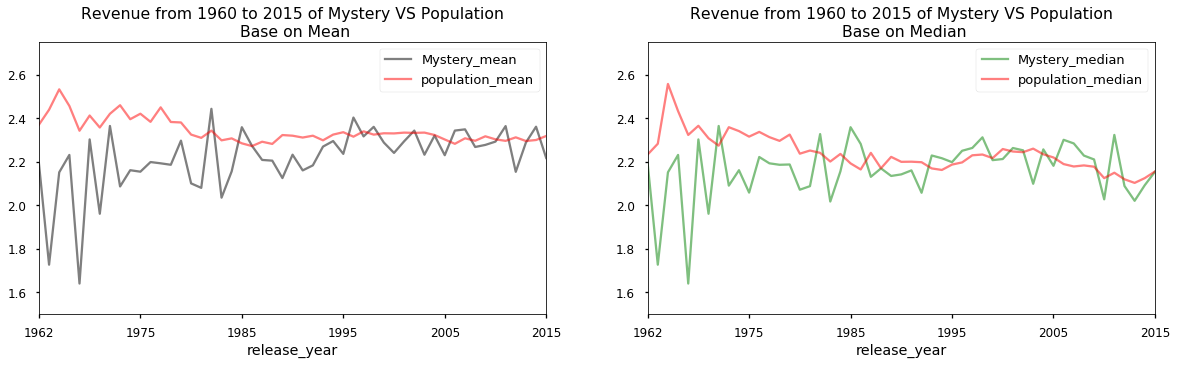

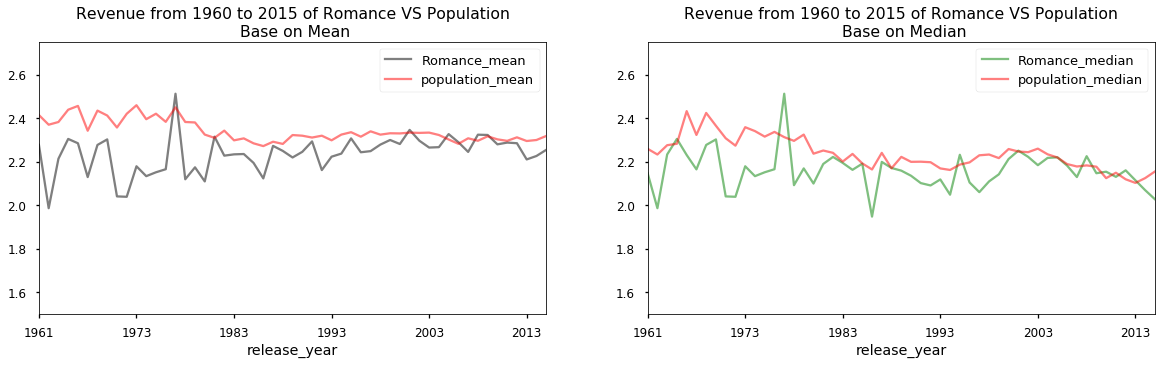

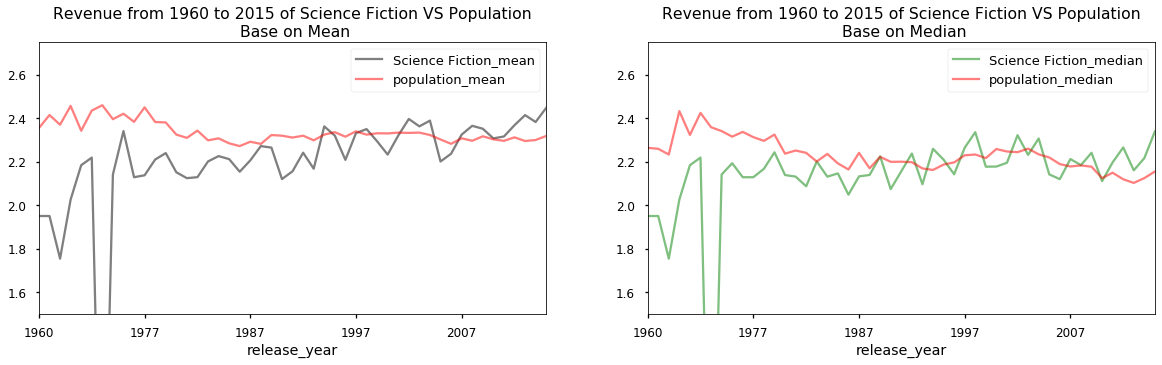

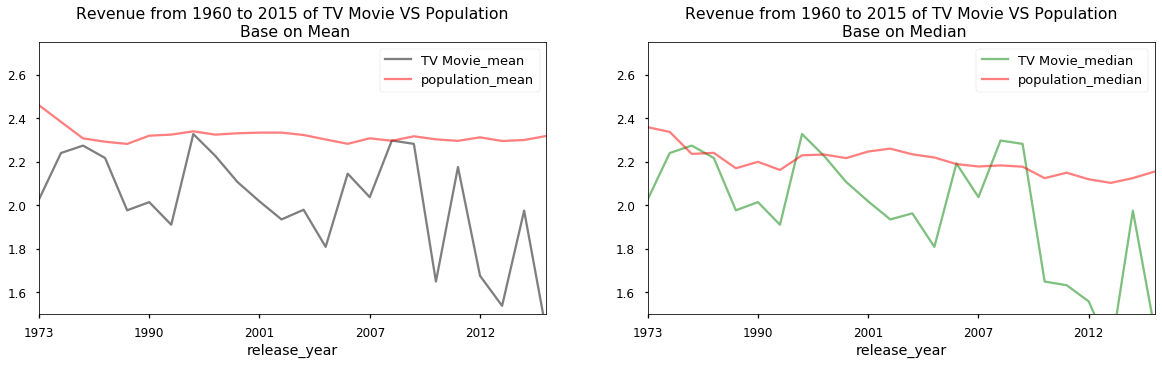

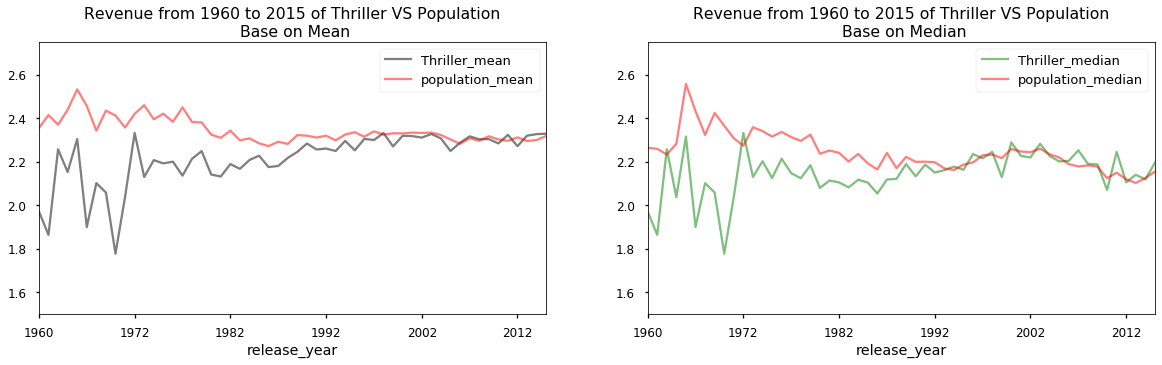

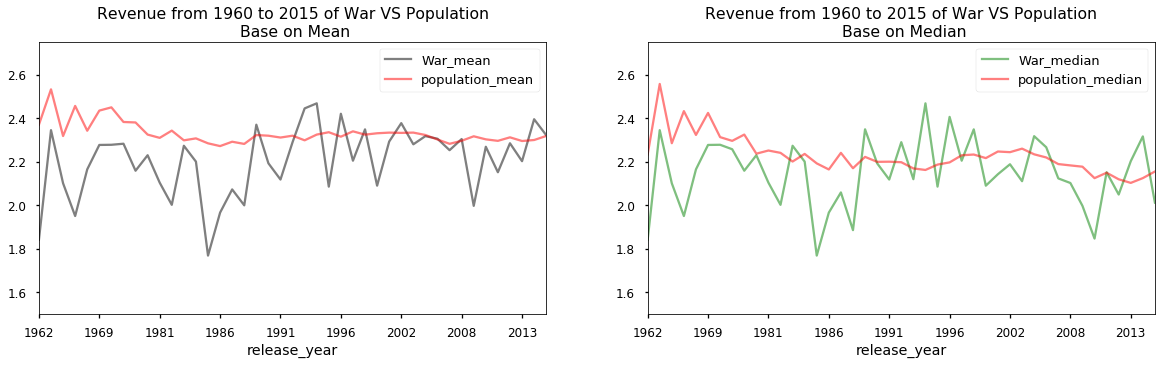

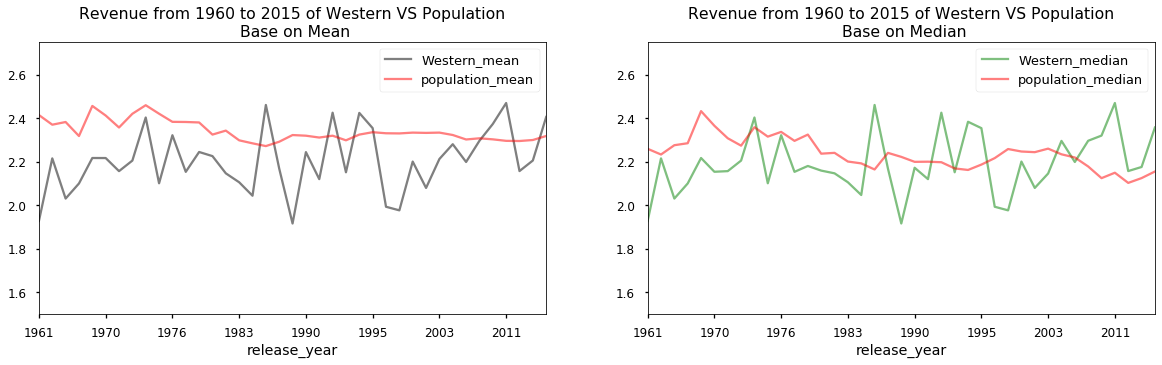

In [36]:
### sum of revenue of different genres VS mean of  population from year 1960 to 2015
population_mean=movies_profit['revenue_adj'].groupby(movies_profit['release_year']).mean()
population_median=movies_profit['revenue_adj'].groupby(movies_profit['release_year']).median()

#print(population_mean.index)

for i in gens:
    #flg,axes=plt.subplots(1,2,figsize=(40,6))
    temper=movies_profit[movies_profit[i]==1]# each genres 
    data=temper[['revenue']].groupby(temper['release_year']).mean()#caculate mean
    data.rename(columns={'revenue':i+'_mean'},inplace=True)
    data[i+'_median']=temper[['revenue']].groupby(temper['release_year']).median()
    
    data['population_mean']=population_mean
    data['population_median']=population_median
    #plot figures
    flg,axes=plt.subplots(1,2) 
    data1=data[[i+'_mean','population_mean']].apply(lambda x: np.log(x)/8)
    data1.plot(kind='line',figsize=(20,5),fontsize=12,alpha=0.5,ax=axes[0],
              color=['black','r'],ylim=[1.5,2.75],
              title='Revenue from 1960 to 2015 of '+i+' VS Population\n Base on Mean')


    
    data2=data[[i+'_median','population_median']].apply(lambda x: np.log(x)/8)
    data2.plot(kind='line',figsize=(20,5),alpha=0.5,ax=axes[1],ylim=[1.5,2.75],
              title='Revenue from 1960 to 2015 of '+i+' VS Population\n Base on Median',
                                                fontsize=12,color=['g','r'])

   
        

####  summary:
1. It can be found that the type of film has a more impact on profits.
2. Drama, Commedy, film revenue performance is more mediocre, consistent with the overall trend of the trend, showing a slight decline.
3. The adventure, Action, animation, family, Fatansy movie revival shows an upward trend as a whole, especially after 2007.
4. Another type of movie, such as Romance, Horror, Music, Romance, etc. is below the overall level.


### explory  properties of high revenue movies

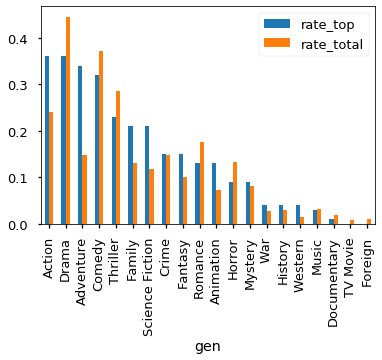

In [37]:
temper_all=movies_profit.sort_values(by='revenue_adj',ascending=False)
total=temper_all.revenue_adj.count()
top_n=100
temper_top=temper_all.head(top_n)
##new data frame
gen_rate=pd.DataFrame(columns=['gen','rate_total','rate_top'])
for i in gens:
    data_all=temper_all[temper_all[i]==1].revenue_adj.count()/total
    data_top=temper_top[temper_top[i]==1].revenue_adj.count()/top_n
    gen_rate.loc[len(gen_rate)]=[i,data_all,data_top]
gen_rate['inter']=gen_rate['rate_top']-gen_rate['rate_total']
gen_rate=gen_rate.set_index('gen')
gen_rate[['rate_top','rate_total']].sort_values(by='rate_top',ascending=False).plot(kind='bar')


### summary:
1. From the above figure we can see the rates of action ,Adeventure,family,Fantansy,Animation,war,western in top 100 revenues are higher than their rates of population.Especilally the  Adeventure nearly twice of rate and Family,Animation.This phenomenon is consistent with poparity of different genres of movies.
2. We can  inferre that investers and audiance all love the Adventure. This kind of movie is more and more popular especially from year to now.
3. Revenue have an relationship with popuarity .

### explory release_year of high revenue movies

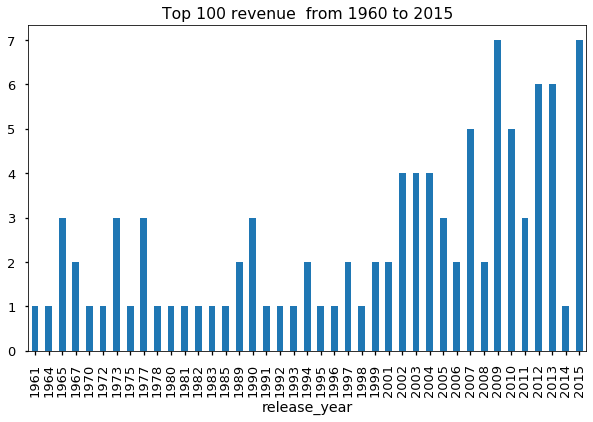

In [38]:
temper=movies_profit.sort_values(by='revenue_adj',ascending=False).head(100)
temper.groupby('release_year').size().plot(kind='bar',figsize=(10,6),title='Top 100 revenue  from 1960 to 2015')

#### summary :
This is a bit different from the overall decline in the previous level of analysis, which shows that the difference in film revenue is relatively large and the two levels are enlarged.


### explory runtime of high revenue movies

107.96474226804123 104.0
131.63 132.5


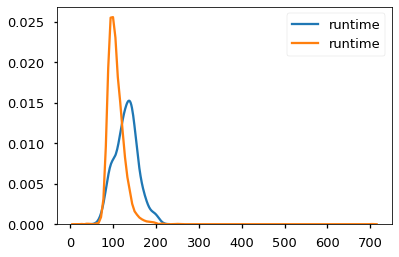

In [39]:
temper=movies_profit.sort_values(by='revenue_adj',ascending=False).head(100)
sns.kdeplot(temper.runtime)
sns.kdeplot(movies_profit.runtime)
print(movies_profit.runtime.mean(),movies_profit.runtime.median())
print(temper.runtime.mean(),temper.runtime.median())

### summary :
For high-revenue movies, the runtime will be a bit higher, and the overall  23-28 min higher.

### explory budget of high revenue movies

29569700.631752577 15000000.0
117412500.0 120000000.0


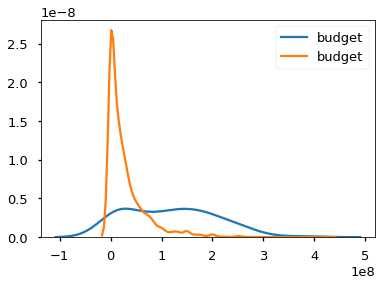

In [40]:
temper=movies_profit.sort_values(by='revenue_adj',ascending=False).head(100)
sns.kdeplot(temper.budget)
sns.kdeplot(movies_profit.budget)
print(movies_profit.budget.mean(),movies_profit.budget.median())
print(temper.budget.mean(),temper.budget.median())

#### Summary:
High_revenue movies, the budget is obviously larger than the overall budget level.
 

# 4.Conclusion
### Three characteristics were found from the analysis of popularity.
1. It can be found that the film went through three stages of development from 1960 to 2015. The period of steady development before 1960-1980.
2. From 1980 to 2000, during the period of rapid development, Drama and Commedy
Rapid development, the main force in the market, meanwhile, action, crime movies have also entered the rapid development at this stage.
3. After 2000, it entered a boom period. Action, Adventure, Fatansy, Animation, Thriller, Science Fiction and other types of movies developed rapidly. Competition in the film industry has intensified, and audience preferences have also changed.
It is worth noting that Adventure, Action, Science Fiction, Animation, and the proportion of output, popularity index and high-revenue type have all increased rapidly at the same time. Is an emerging film market.

### On the correlation analysis of high-yield and other attributes, runtime, release_year, budget, and genres are selected for analysis. The following problems can be found through analysis:
1. Movie revenue is statistically related to runtime, and high-yield movies are 24-28 minutes longer than normal movies.
2. The release year of movies and movie revenues are on the decline overall, but high-revenue movies have appeared since 2002. What does this mean after 2002?There is a large difference in movie revenue in general. Movies with high revenue are extremely high, but movies with low revenue are even lower.
3. The budget of a movie is positively related to the income of the movie. The budget of a high-yield movie is definitely higher than the average movie.
4. Fast-growing films such as Adventure, Action, Science Fiction, and Animation have a higher percentage of high-revenue movies.


# references
1. Wes Mckinney.Python for Data Analysis